# Final Exam

###### When I evaluate this notebook I will select Run All from the Cell drop-down menu. If a cell produces an error, it will not receive any credit. So please
* make sure that all the cells execute as you intend
* double-check test functions and variable names
* you can Restart & Run All the (from the Kernel drop-down men) to re-run the entire notebook before you submit to be certain

###### Make sure that the notebook you submit is populated with your solutions. An empty notebook will receive 0 points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.fftpack import ifft
from scipy.interpolate import barycentric_interpolate as tn

### Potentially Useful Function (the problems start 2 cells below)

In [2]:
def clencurt(n1):
    from scipy.fftpack import fft,ifft,fftshift,ifftshift
    # Computes the Clenshaw Curtis nodes and weights
    # Input:  n1 = number of nodes and weights requested
    # Output: x nodes and w weights
    # Note that these nodes include the endpoints
    n = n1 - 1
    C = np.zeros((n1,2))
    k = 2*(1+np.arange(np.floor(n/2)))
    # Compute weights --> integral of Tn(x)
    C[::2,0] = 2/np.hstack((1, 1-k*k))
    C[1,1] = -n
    V = np.vstack((C,np.flipud(C[1:n,:])))
    # Real part of inverse FFT ~ Cosine transform
    F = np.real(ifft(V, n=None, axis=0))
    x = F[:n1,1]
    w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

# $\star$ PROBLEMS START HERE $\star$

### Problem 1 Fit the signal that loads below using the DFT. Display the resulting fit by overlaying it on the data.

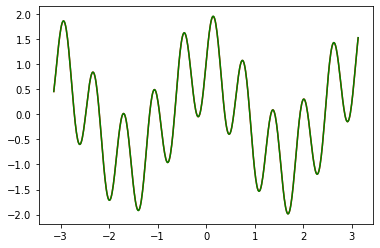

In [3]:
# Your code for Problem 1 in this cell. Add cells as required.
# Make sure that the signal.npy file is in the same directory as this Jupyter notebook.
# If you still have trouble loading it, copy and paste the array, from the text file provided,
# into a cell above.

# *** Provide collocation code here ***
signal = np.load('signal.npy')
N = len(signal)
# You will need to choose an appropriate Nk
Nk = N
#print(Nk)
x = np.linspace(-np.pi,np.pi,N+1)
x = x[:-1]
k = np.arange(-Nk/2+1,Nk/2+1) # Recall arange leaves out last value
# Outer Product for Fitting
kx = np.outer(k,x)
C = np.cos(np.outer(k,x))
S = np.sin(np.outer(k,x))
a = C.dot(signal)/(N-1)
b = S.dot(signal)/(N-1)
Hc = a.dot(C)
Hs = b.dot(S)
H = Hc + Hs
plt.plot(x,signal,'r-',x,H,'g-');

### Problem 2 Compare the Clenshaw-Curtis rule versus Gaussian Quadrature rule for approximating $\displaystyle \int_0^1 \frac{4}{1+x^2}\,dx$ with number of nodes equaling $5, 7, 9, \ldots, 21$. The exact value of this integral is $\pi$, given two cells below.

In [4]:
def w(x):
    return 4/(1+x**2) #changed to w to make sure it didn't mess with anything

In [5]:
def transint(x,w,a,b):
    x = (b-a)*(x + (a+b)/(b-a))/2
    w = (b-a)*w/2
    return x,w

In [6]:
def clencurt(n1):
    n = n1 - 1
    C = np.zeros((n1,2))
    k = 2*(1+np.arange(np.floor(n/2)))
    # Compute weights --> integral of Tn(x)
    C[::2,0] = 2/np.hstack((1, 1-k*k))
    C[1,1] = -n
    V = np.vstack((C,np.flipud(C[1:n,:])))
    # Real part of inverse FFT ~ Cosine transform
    F = np.real(ifft(V, n=None, axis=0))
    x = F[:n1,1]
    w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

In [7]:
def myclencurt(N, func, a = -1, b = 1):
    x, w = clencurt(N)
    x, w = transint(x,w,a,b)
    return w.dot(func(x))

In [8]:
# Your code for Problem 2 in this cell. Add cells as required.
test = np.pi # Exact value of the integral
eps = np.finfo(float).eps # You might find this value helpful
def mygauss(N,f,a=-1,b=1):
    x, w = np.polynomial.legendre.leggauss(N)
    xt,wt = transint(x,w,a,b)
    return wt.dot(f(xt))

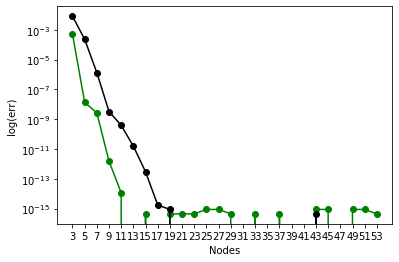

In [9]:
a=0
b=1
errg = []
errc = []
Nvec = 2*np.arange(1,27)+1
for N in Nvec:
    G = mygauss(N,w,a,b)
    C = myclencurt(N,w,a,b)
    errg.append(np.fabs(G-test))
    errc.append(np.fabs(C-test))
plt.semilogy(Nvec,errg,'go-',Nvec,errc,'ko-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);
#Green is Gauss,Black is Clenshaw-Curtis

### Problem 3 Use trigonometric interpolation to approximate the value of $f(0.3)$ for the function $f(x) = 1-|\,x\,|$ on $x\in[-\pi,\pi]$.
* You may find plotting the collocated function overlaying the data helpful as it should do so (pretty much) exactly.

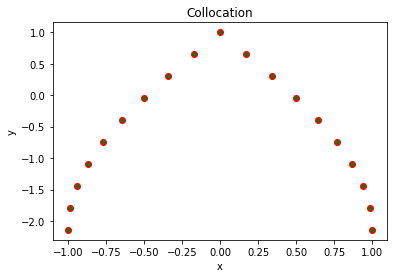

In [10]:
# Your code for Problem 3 in this cell. Add cells as required.
N = 19
x = np.linspace(-np.pi,np.pi,N)
g = 1 - np.fabs(x) #changed function name to g for ease of use
x,w = clencurt(N)
phi= np.vander(x,N,increasing=True)
c = np.linalg.solve(phi,g)
y=np.dot(phi,c)
plt.plot(x,g,'ro',x,y,'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Collocation');

0.37319604600607453


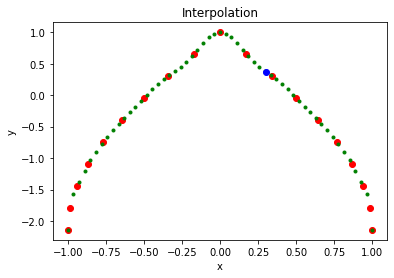

In [11]:
Ni = 55
xi = np.linspace(-1,1,Ni)
phitwo = np.vander(xi,N,increasing=True)
yi=np.dot(phitwo,c)
z = tn(xi,yi,.3)
print(z)
plt.plot(x,g,'ro',xi,yi,'g.',.3,z,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation');
#Blue Dot on graph is f(.3) (which was determined using z)

### Problem 4 Write a script that executes the following quadrature rule given by weights $w = \frac3{10}h[1,5,1,6,1,5,1]$ with evenly-spaced nodes over an interval $[a,b]$. Test the rule on $\mathrm{erf}(1) = \frac2{\sqrt{\pi}}\int_0^1e^{-x^2}\,dx$ and output the absolute error.
* FYI the rule is pretty accurate and the error should be roughly 1.4202e-07

In [12]:
# Your code for Problem 4 in this cell. Add cells as required.
test = np.math.erf(1) # Here is the exact value of the integral
z = 0.5*np.array([2,3]) # Here is an example on how to construct a NumPy array

In [1]:
a,b=0,1
n=7
def wojquad (f,a,b,n):
    h = (b-a)/(n-1)
    x=np.linspace(a,b,N)
    testarr = np.ones(7)
    testarr[1] = 5*testarr[1]
    testarr[3] = 6*testarr[3]
    testarr[5] = 5*testarr[5]
    #print(testarr)
    testarr=.3*testarr
    #print(testarr)
    woj = h*np.dot(f(x),testarr)
    return woj
#print(wojquad(f,a,b,n)) #Shape Mistmatch
print(woj)
print(test)
#can't seem to get my quadrature rule definition to turn into a single value
#Shape Mismatch

NameError: name 'woj' is not defined

### $\star$ Choose problem 5 or 6 (but not both). Please leave the non-selected problem blank. $\star$

### Problem 5 Find $x$ such that $\sin(x^2) = \frac1{\pi}\int_0^\pi\sin(t^2)\,dt$.

In [14]:
# Your code for Problem 5 in this cell. Add cells as required.

### Problem 6 Use Chebyshev nodes to interpolate the function $f(x) = \frac{1}{1+25x^2}$ on the interval $[-1,1]$.

In [15]:
# Your code for Problem 6 in this cell. Add cells as required.
def f(x):
    return 1/(1+25*x**2)

In [16]:
def transint(x,w,a,b):
    x = (b-a)*(x + (a+b)/(b-a))/2
    w = (b-a)*w/2
    return x,w

In [17]:
def clencurt(n1):
    n = n1 - 1
    C = np.zeros((n1,2))
    k = 2*(1+np.arange(np.floor(n/2)))
    # Compute weights --> integral of Tn(x)
    C[::2,0] = 2/np.hstack((1, 1-k*k))
    C[1,1] = -n
    V = np.vstack((C,np.flipud(C[1:n,:])))
    # Real part of inverse FFT ~ Cosine transform
    F = np.real(ifft(V, n=None, axis=0))
    x = F[:n1,1]
    w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

In [18]:
def myclencurt(N, func, a = -1, b = 1):
    x, w = clencurt(N)
    x, w = transint(x,w,a,b)
    return w.dot(func(x))

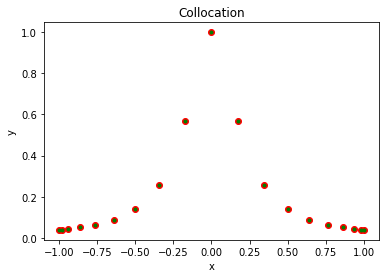

In [19]:
nodes = 19
x,w = clencurt(nodes)
phi= np.vander(x,N=nodes,increasing=True)
c = np.linalg.solve(phi,f(x))
y=np.dot(phi,c)
plt.plot(x,f(x),'ro',x,y,'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Collocation');

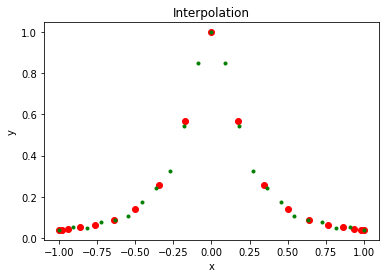

In [20]:
Ni = 23
xi = np.linspace(-1,1,Ni)
phitwo = np.vander(xi,N=nodes,increasing=True)
yi=np.dot(phitwo,c)
plt.plot(x,f(x),'ro',xi,yi,'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation');

###### It was a privilege introducing you to numerical analysis. I hope that you have gained an appreciation for computational mathematics and I hope that you open your eyes to see the profound impact that it has on your life. Good luck!